In [1]:
import keras
import nltk
import pandas as pd
import numpy as np
import re
import io
import matplotlib
from IPython.display import display
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
!gdown --id 1ti6QbZh_j9rh9fhKGZIoThM7FN9tF3Un #training data

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ti6QbZh_j9rh9fhKGZIoThM7FN9tF3Un
To: /content/labeled_data.csv
100% 2.57M/2.57M [00:00<00:00, 118MB/s]


In [3]:
tweets = pd.read_csv('/content/stormfront1.csv')
tweets.fillna('None')
tweets["body"].fillna("No Tweet", inplace = True)
tweets["gold_label"].fillna(0, inplace = True)
dicti = { 'gold_label': 'class','body': 'tweet'}
tweets.rename(columns=dicti,
          inplace=True)
display(tweets.groupby("class").count())

,Unnamed: 0,tweet,User Id
class,,,
0.0,19473,19473,19473
1.0,20530,20530,20530


In [4]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
nltk.download('punkt')
ps = PorterStemmer()
for i in range(len(tweets)):
  words = word_tokenize(tweets['tweet'][i])
  for j in range(len(words)):
    words[j] = ps.stem(words[j]) if words[j] not in set(all_stopwords) else ''
  tweets['tweet'][i] = ' '.join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [5]:
display(tweets.head())

,Unnamed: 0,tweet,class,User Id
0,0,fuck i dont wan na watch tranni porn .,1.0,0
1,1,opi want good time . the old rant africa...,1.0,1
2,2,fuck faggot fallon . fuck sissi boy act like ...,1.0,2
3,3,bbbb ... b.b .. b.bb op 's faggot,1.0,3
4,4,who even use word tranni except transphob lol,0.0,4


In [6]:
tweets['tweet'][0]

'fuck  i dont wan na watch tranni porn .'

In [7]:
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "") # remove URL protocol with trailing whitespace
    df[text_field] = df[text_field].str.replace(r"http", "") # remove URL protocol
    df[text_field] = df[text_field].str.replace(r"@\S+", "") # remove at signs with leading spaces 
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\n]", " ") # remove non-alphanumerical
    df[text_field] = df[text_field].str.replace(r"@", "at") # replace at signs with "at"
    df[text_field] = df[text_field].str.replace(r'\b\w{1,3}\b', '') # replace at words
    df[text_field] = df[text_field].str.replace(r'[0-9]', '') # replace at words
    df[text_field] = df[text_field].str.lower() # convert all to lowercase
    # df[text_field] = df[text_field].apply(lambda x: ''.join([stemmer.stem(y) for y in x]))
    return df

In [8]:
# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize
# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
# lemmatizer = nltk.stem.WordNetLemmatizer()
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# ps = PorterStemmer()
# def cleann(df,text_field):
#   df[text_field] = df[text_field].apply(lambda x: ''.join([ps.stem(y) for y in x]))
#   # xp = pd.DataFrame(df[text_field], columns=[text_field])
#   # df[text_field] = xp.text_field.apply([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text_field)])
#   return df

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# function to transform tweets to vectorized bag of word embedding
def vectorizer(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

# set of all tweet text
# list_corpus = tweets["tweet"]
list_corpus = tweets[['class', 'tweet']]
# set of all tweet class labels
list_labels = tweets["class"].tolist()

# split into 80/20 train/test 
X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=69)

X_train = clean_text(X_train, "tweet")
# print(X_train)
# # X_train = cleann(X_train,'tweet')
# print(X_train)

# convert training and test set word to bag of words vectorized representation
X_train_counts, count_vectorizer = vectorizer(X_train['tweet'])
X_test_counts = count_vectorizer.transform(X_test['tweet'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [10]:
from sklearn.linear_model import LogisticRegression

# define logistic regression model 
clf = LogisticRegression()

# fit model on training data
clf.fit(X_train_counts, y_train)

# get model predictions on bag of words vectorized test data
y_predicted_counts = clf.predict(X_test_counts)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_np = clf.predict(X_test_counts)
cm = confusion_matrix(y_test, y_pred_np)
print(classification_report(y_test,y_pred_np))

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      3923
         1.0       0.76      0.82      0.79      4078

    accuracy                           0.78      8001
   macro avg       0.78      0.77      0.77      8001
weighted avg       0.78      0.78      0.77      8001



In [12]:
def get_most_important_features(vectorizer, coefficients, n=20):
    
    # convert index of word from vectorizer into the word 
    index_to_word = {index:word for word,index in count_vectorizer.vocabulary_.items()}
    
    # assign coefficient to word by matching the index of the coefficient and word
    word_importances = [(coef, index_to_word[index]) for index, coef in enumerate(clf.coef_[0])]
    sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
    # n = len(word_importances)//2
    # print(word_importances)
    p = []
    n = 0
    for x,y in sorted_coeff:
      if(x>=0):
        n+=1
      p.append(y)
    print(p)
    print(n)
    top = sorted(sorted_coeff[:20], key = lambda x : x)
    print(sorted_coeff[:n])
    print([y for x,y in sorted_coeff[:n]])

    print(len(set(word_importances)))
    bottom = sorted_coeff[-20:]
    print(sorted_coeff[n:])
    p= [y for x,y in sorted_coeff[n:]]
    print(p[::-1])
    print(len(p))
    classes = {
        'top':top,
        'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf.coef_)

['testosteron', 'thier', 'assign', 'forbidden', 'tren', 'shockingli', 'tini', 'samoan', 'dune', 'sala', 'whini', 'diari', 'bald', 'invest', 'syndrom', 'robe', 'error', 'hooker', 'yank', 'strap', 'midget', 'thailand', 'cling', 'worthless', 'wimp', 'download', 'granddad', 'cell', 'brianna', 'landwhal', 'tactic', 'moon', 'islamist', 'collaps', 'whitey', 'spontan', 'deprav', 'pornstar', 'academ', 'nuclear', 'epic', 'centrist', 'butthurt', 'regress', 'penguin', 'cmon', 'burger', 'unsaf', 'elitist', 'cheat', 'steril', 'wannab', 'swat', 'buzzword', 'boner', 'unarm', 'unprotect', 'mfc', 'degeneraci', 'sympathi', 'gift', 'goth', 'preced', 'anal', 'baptist', 'agdq', 'stain', 'drown', 'whale', 'empir', 'diseas', 'sheesh', 'repost', 'duti', 'porn', 'squat', 'parad', 'analysi', 'pill', 'anthoni', 'cater', 'crash', 'orgi', 'sneak', 'canada', 'knowledg', 'shitstorm', 'crazier', 'dealt', 'prostitut', 'tranni', 'clickbait', 'goon', 'logo', 'evalu', 'poverti', 'over', 'toilet', 'gigant', 'shitload', 'bo

In [13]:
# for x in importance['bottom']:
#   print(x)

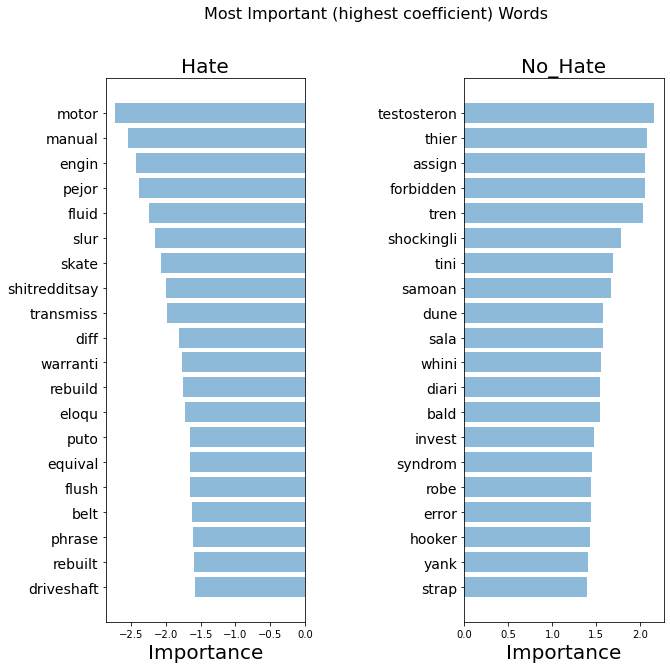

In [14]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, title):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  
    
    # plot words with most negative coefficients (irrelevant words)
    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Hate', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    #plt.xlim(-8,0)
    
    # plot words with highest coefficients (relevant/disaster words)
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('No_Hate', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(title, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    #plt.xlim(0,8)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [word_score[0] for word_score in importance['top']]
top_words = [word_score[1] for word_score in importance['top']]
bottom_scores = [word_score[0] for word_score in importance['bottom']]
bottom_words = [word_score[1] for word_score in importance['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most Important (highest coefficient) Words")